In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from collections import Counter
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('region.csv', on_bad_lines='skip')
df


,channel_name,message,address,город,район,coodsX,coodY,cost,gender,people_needed,long_term,phone_number,utilities,deposit
0,Аренда Жилья.Подселение Алматы,Ищу отдельную комнату только для себя в 2комна...,Алмалинском районе,Алматы,Алмалинский район,76.924545,43.250430,80000.0,female,4.0,NaN,8747 668 8502,False,NaN
1,Аренда квартир Алматы - Чат,Пойду на подселение к девушкам в районе Бостан...,Бостандыкский либо Ауэзовский ближе к КазНУ,Алматы,Бостандыкский район,76.885681,43.207524,70000.0,female,NaN,NaN,7 708 047 00 85,False,NaN
2,Аренда Жилья.Подселение Алматы,Добрый день КВ в центре города Ищем девушку на...,Брусиловского 159,Алматы,Алмалинский район,76.876760,43.245399,60000.0,female,2.0,NaN,77081022613,False,NaN
3,Аренда квартир Алматы - Чат,пойду на подселение 1 девушка желательно если ...,Бостан или Алмалинский,Алматы,Алмалинский район,76.940288,43.248394,60000.0,female,2.0,NaN,7477507282,False,NaN
4,ПОДСЕЛЕНИЕ АЛМАТЫ КВАРТИРА,Срочно Ищем комнату для подселения только для ...,Алмалинском районе,Алматы,Алмалинский район,76.924545,43.250430,50000.0,female,2.0,NaN,7 707 553 4852,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13458,ПОДСЕЛЕНИЕ АЛМАТЫ,Сдается ПОСУТОЧНО уютная новаястильная и идеал...,ЖК,Алматы,Бостандыкский район,76.898774,43.200762,NaN,NaN,4.0,0.0,87718777771,False,NaN
13459,ПОДСЕЛЕНИЕ АЛМАТЫ,Ищу парней на подселение в бостандыкском район...,бостандыкском районе,Алматы,Турксибский район,77.011309,43.348096,NaN,male,NaN,NaN,9911 или 87071223857,False,NaN
13460,ПОДСЕЛЕНИЕ АЛМАТЫ,С 1 января сдается однокомнатная квартира на 5...,Сатпаева Туркебаева,Алматы,Бостандыкский район,76.882368,43.233967,NaN,NaN,4.0,1.0,87077173741,False,NaN
13461,ПОДСЕЛЕНИЕ АЛМАТЫ,Срочно сдается комната в 3х комнатной квартире...,Карасай батыр Жарокова,Алматы,Алмалинский район,76.898233,43.248104,NaN,female,NaN,NaN,87078609232,False,NaN


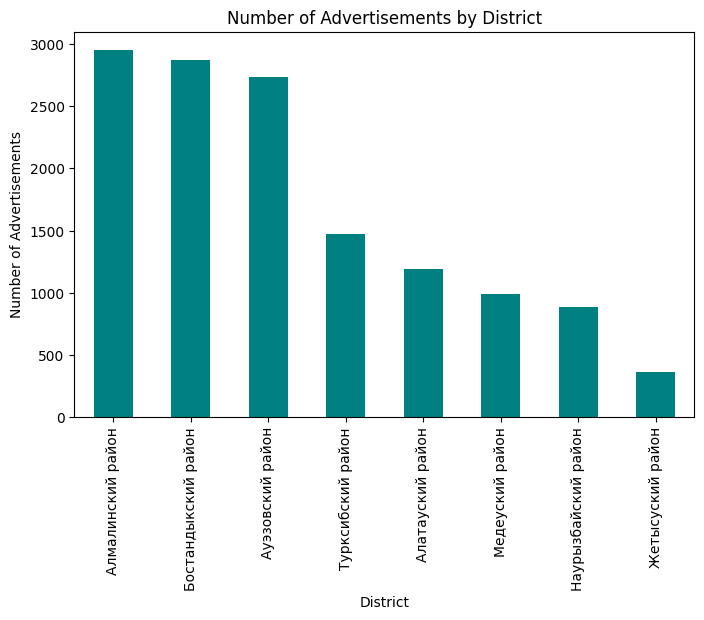

In [21]:
# 1. Распределение количества объявлений по городам (Mock: Using `address` as a placeholder)

# Count the number of advertisements by district
city_counts = df['район'].value_counts()

plt.figure(figsize=(8, 5))
# Plot the number of advertisements by district as a bar chart
city_counts.plot(kind='bar', color='teal')
plt.title('Number of Advertisements by District')
plt.xlabel('District')
plt.ylabel('Number of Advertisements')
plt.show()


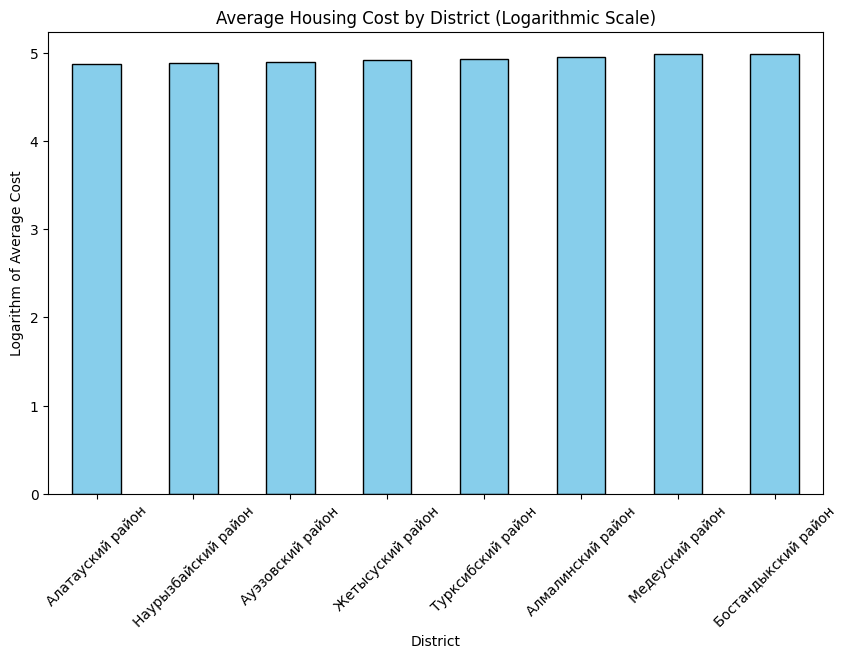

In [5]:
# 13. Средняя стоимость жилья по городам

# Calculate the average price by district
avg_price_by_city = df.groupby('район')['cost'].mean().sort_values()

# Calculate the logarithmic values of the average prices
log_avg_price_by_city = np.log10(avg_price_by_city)

# Plot the logarithmic scale bar chart
plt.figure(figsize=(10, 6))
log_avg_price_by_city.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Housing Cost by District (Logarithmic Scale)')
plt.xlabel('District')
plt.ylabel('Logarithm of Average Cost')
plt.xticks(rotation=45)
plt.show()


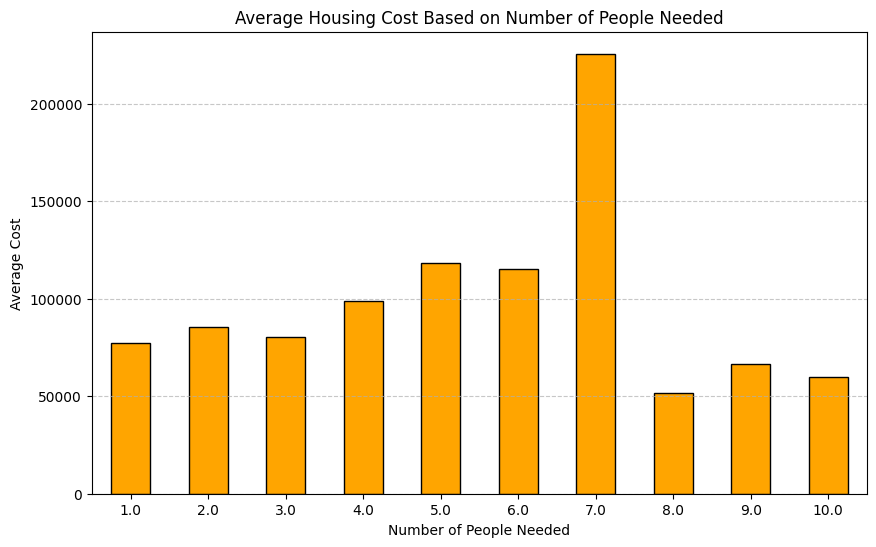

In [6]:
# 14. Средняя стоимость жилья в зависимости от количества необходимых людей

# Calculate the average price based on the number of people needed
avg_price_by_people = df.groupby('people_needed')['cost'].mean().sort_index()

plt.figure(figsize=(10, 6))
# Plot the average price by the number of people needed as a bar chart
avg_price_by_people.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Housing Cost Based on Number of People Needed')
plt.xlabel('Number of People Needed')
plt.ylabel('Average Cost')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

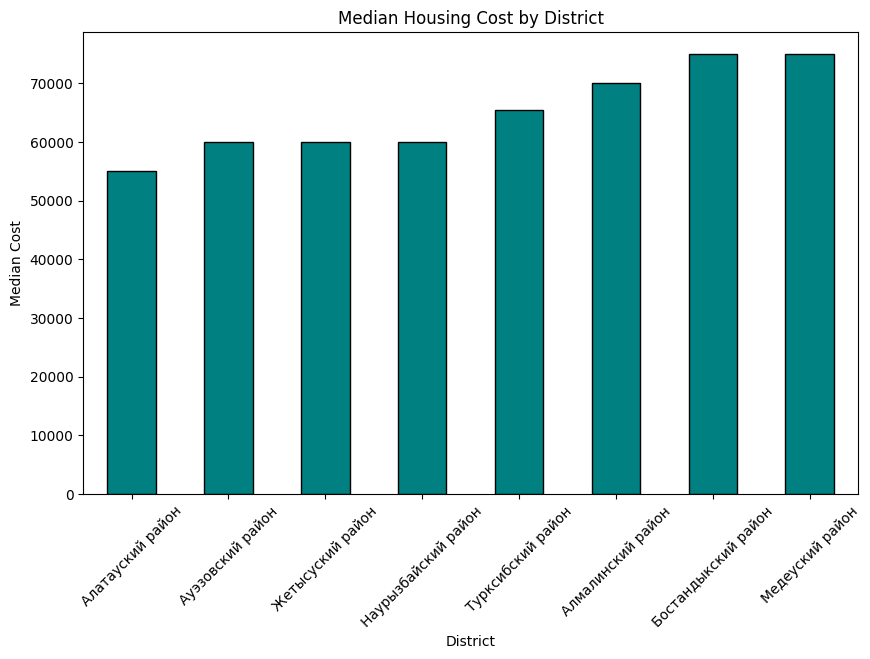

In [7]:
# 18. Анализ медианной цены по каждому городу

# Calculate the median price by district
median_price_by_city = df.groupby('район')['cost'].median().sort_values()

plt.figure(figsize=(10, 6))
# Plot the median price by district as a bar chart
median_price_by_city.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Median Housing Cost by District')
plt.xlabel('District')
plt.ylabel('Median Cost')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

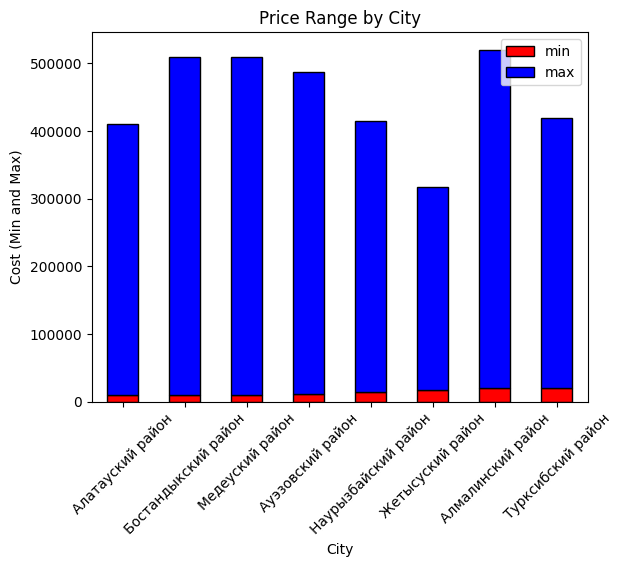

,район,min,max
0,Алатауский район,10000.0,400000.0
1,Бостандыкский район,10000.0,500000.0
2,Медеуский район,10000.0,500000.0
3,Ауэзовский район,12000.0,475000.0
4,Наурызбайский район,15000.0,400000.0
5,Жетысуский район,17500.0,300000.0
6,Алмалинский район,20000.0,500000.0
7,Турксибский район,20000.0,400000.0


In [8]:
# 19. Диапазон цен (минимум, максимум) по каждому городу

# Calculate the price range (min and max) by district
price_range_by_city = df.groupby('район')['cost'].agg(['min', 'max']).sort_values('min')

# Plot the price range by district as a stacked bar chart
plt.figure(figsize=(10, 6))
price_range_by_city.plot(kind='bar', stacked=True, color=['red', 'blue'], edgecolor='black')
plt.title('Price Range by City')
plt.xlabel('City')
plt.ylabel('Cost (Min and Max)')
plt.xticks(rotation=45)
plt.show()

# Display the table with price ranges
price_range_by_city.reset_index()


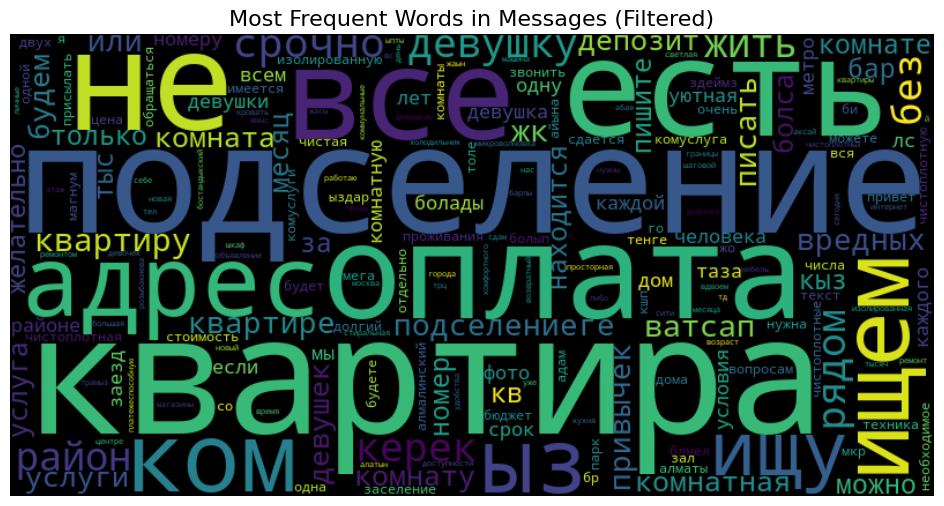

In [9]:
# Define a list of stopwords
stopwords = {'и', 'в', 'на', 'с', 'по', 'что', 'из', 'для', 'а', 'это', 'от', 'у', 'к', 'до', 'как', 'же', 'х', 'тг'}

# Process the text
messages = df['message'].dropna()
all_words = ' '.join(messages)

# Clean the text
cleaned_words = re.sub(r'[^а-яА-Яa-zA-Z\s]', '', all_words).lower()
words = cleaned_words.split()

# Filter out stopwords
filtered_words = [word for word in words if word not in stopwords]

# Count the frequency of words
word_counts = Counter(filtered_words)

# Create a WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    max_words=200,
    colormap='viridis'
).generate_from_frequencies(word_counts)

# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Frequent Words in Messages (Filtered)', fontsize=16)
plt.axis('off')
plt.show()

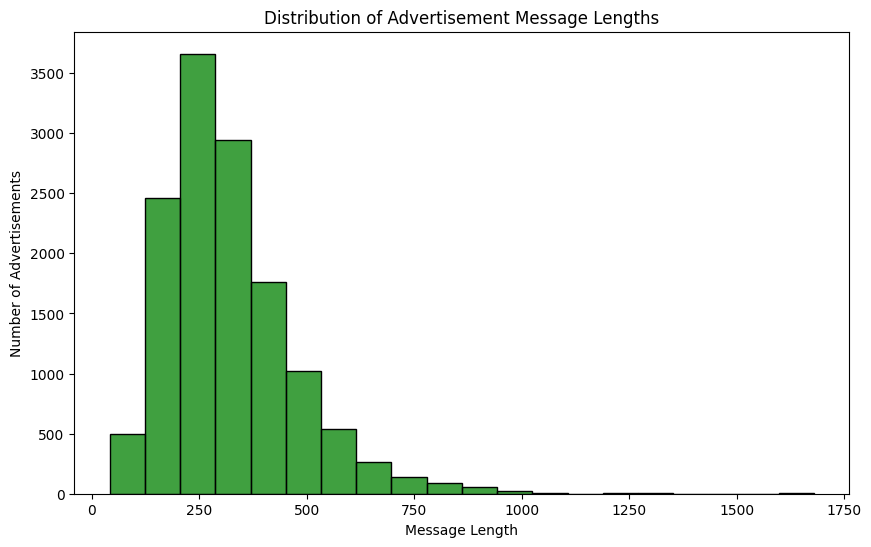

In [10]:
# 22. Распределение длины сообщений объявлений

# Calculate the lengths of messages in the 'message' column, excluding missing values
message_lengths = df['message'].dropna().str.len()

# Plot the distribution of message lengths as a histogram
plt.figure(figsize=(10, 6))
sns.histplot(message_lengths, bins=20, color='green')
plt.title('Distribution of Advertisement Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Number of Advertisements')
plt.show()

In [11]:
# 24. Частота упоминания "ЖК" (жилых комплексов) в текстах

jkc_mentions = df['message'].str.contains(r'\bЖК\b', na=False, case=False).sum()

print(f"Frequency of mentioning 'ЖК': {jkc_mentions}")


Frequency of mentioning 'ЖК': 2475


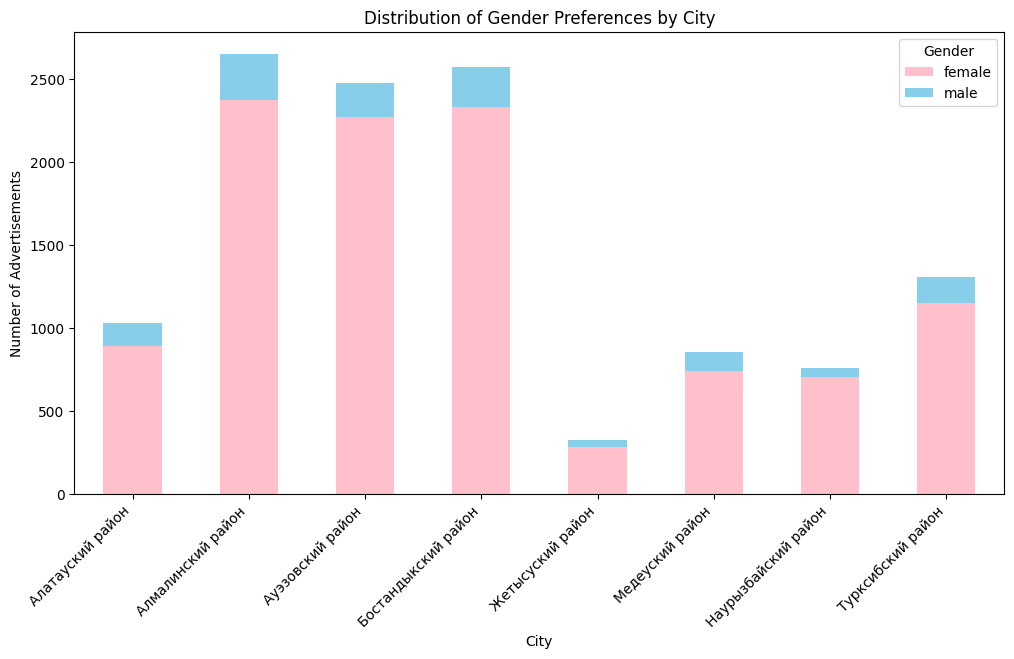

In [12]:
# 25. Распределение гендерных предпочтений по городам

# Calculate the gender preferences distribution by district
gender_city_distribution = df.groupby(['район', 'gender']).size().unstack(fill_value=0)

# Plot the distribution of gender preferences by city
gender_city_distribution.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['pink', 'skyblue']
)
plt.title('Distribution of Gender Preferences by City')
plt.xlabel('City')
plt.ylabel('Number of Advertisements')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.legend(title='Gender', loc='upper right')
plt.show()


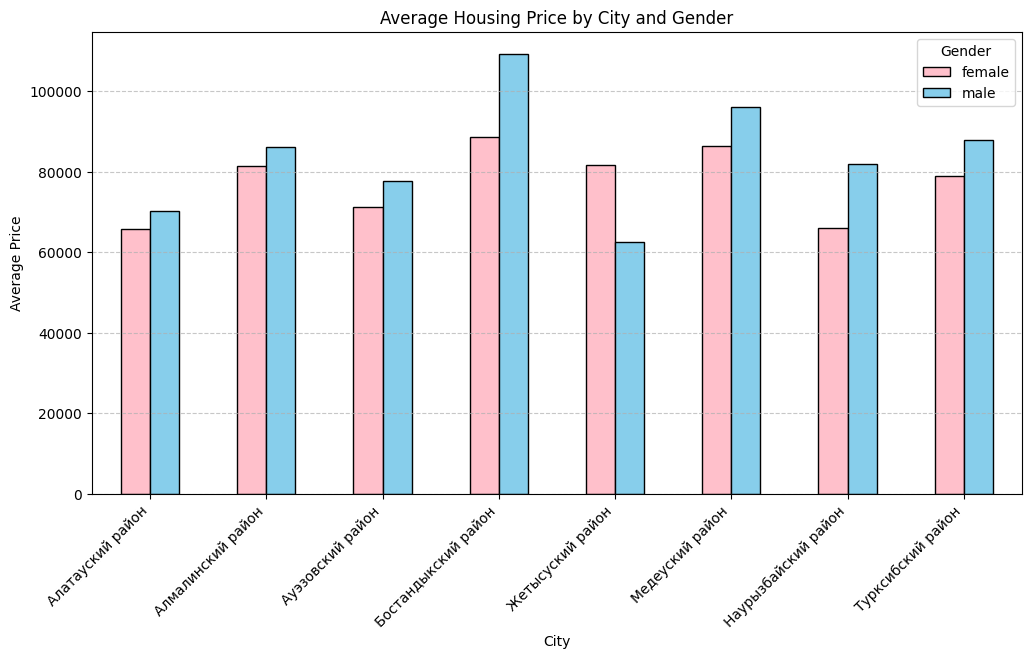

In [13]:
# 26. Средняя стоимость жилья для каждого гендера по городам

# Calculate the average price by city and gender
avg_price_gender_city = df.groupby(['район', 'gender'])['cost'].mean().unstack()

# Plot the average housing price by city and gender
avg_price_gender_city.plot(
    kind='bar',
    figsize=(12, 6),
    color=['pink', 'skyblue'],
    edgecolor='black'
)
plt.title('Average Housing Price by City and Gender')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.legend(title='Gender', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
# 27. Доля объявлений без указания гендерных предпочтений

# Calculate the percentage of advertisements with no gender preference
total_ads = len(df)
no_gender_ads = df['gender'].isna().sum()
percentage_no_gender = (no_gender_ads / total_ads) * 100

print(f"Percentage of advertisements with no specified gender preference: {percentage_no_gender:.2f}%")



Percentage of advertisements with no specified gender preference: 10.98%


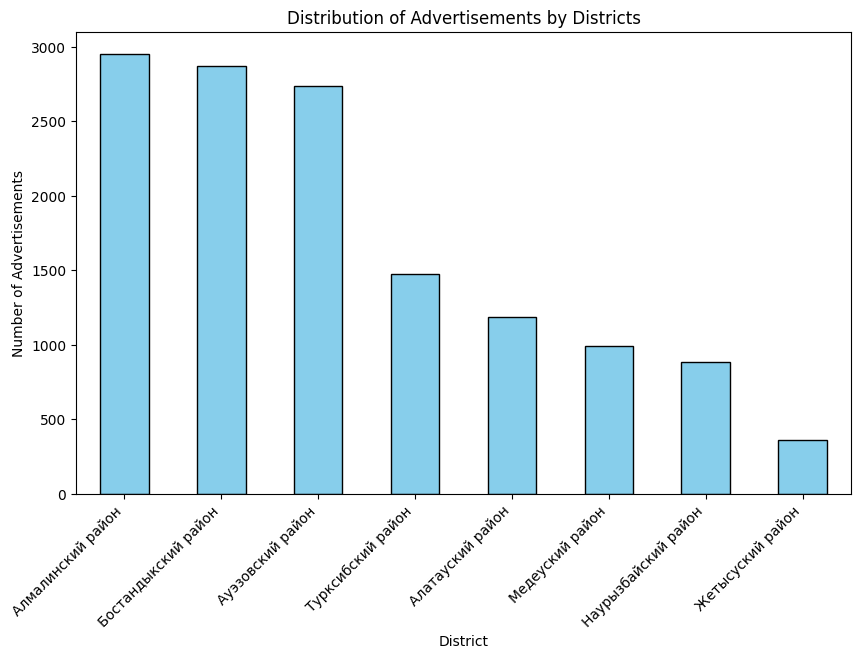

In [15]:
# 34. Распределение количества объявлений по каждому каналу

# Count the number of advertisements by district
channel_distribution = df['район'].value_counts()

# Plot the distribution of advertisements by districts
plt.figure(figsize=(10, 6))
channel_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Advertisements by Districts')
plt.xlabel('District')
plt.ylabel('Number of Advertisements')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()

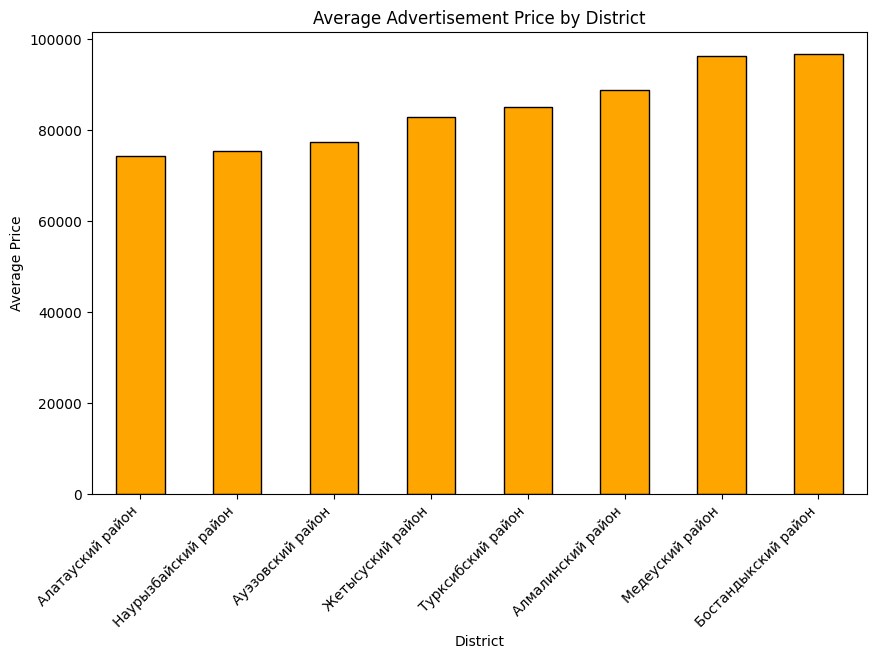

In [16]:
# 35. Средняя стоимость объявлений для каждого канала

# Calculate the average cost of advertisements by district
avg_cost_by_channel = df.groupby('район')['cost'].mean().sort_values()

# Plot the average cost of advertisements by district
plt.figure(figsize=(10, 6))
avg_cost_by_channel.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Advertisement Price by District')
plt.xlabel('District')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()

In [17]:
# 36 # Каналы с самой высокой и самой низкой средней ценой

# Identify the districts with the highest and lowest average prices
max_channel = avg_cost_by_channel.idxmax()
min_channel = avg_cost_by_channel.idxmin()
max_price = avg_cost_by_channel.max()
min_price = avg_cost_by_channel.min()

print(f"District with the highest average price: {max_channel} ({max_price:.2f})")
print(f"District with the lowest average price: {min_channel} ({min_price:.2f})")

District with the highest average price: Бостандыкский район (96815.40)
District with the lowest average price: Алатауский район (74333.21)
